### Web Sitesinde Geçirilen Sürenin Testi-Nonparametrik Tek Örneklem Testi-İş Uygulaması(Dönşüm Oranı Testi)-Bagımsız İki Örneklem T testi (AB Testi)-İş Uygulaması(ML modelinin Başarı Testi(AB Testi))

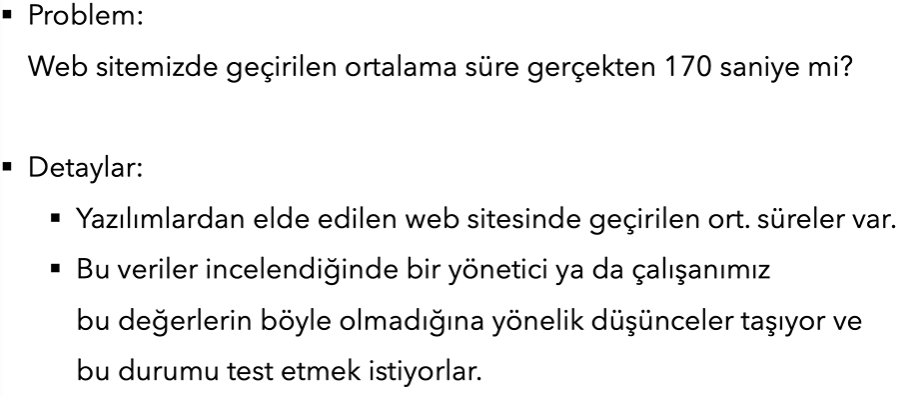

Ho:µ=170

H1:µ≠170    
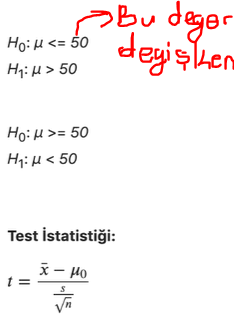

In [11]:
import pandas as pd
import numpy as np
olcumler=np.array([17,160,234,149,145,107,197,75,201,225,211,199,157,145,127,244,163,114,145,65,112,185,202,146,203,224,203,114,188,156,187,154,177,95,165,50,110,216,138,151,166,135,155,84,251,173,131,207,121,120])

In [4]:
olcumler[0:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

In [5]:
#biçimsel istatisklerine bakalım
import scipy.stats as stats

In [6]:
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=155.98, variance=2590.5097959183668, skewness=-0.39613480387122996, kurtosis=-0.035052817192215535)

In [9]:
#varsımlarımız
#Tek Örneklem T testi varsıyım Kontrolü(2 türlü olarak gerçekleştirebilir grafik ve test şeklinde)

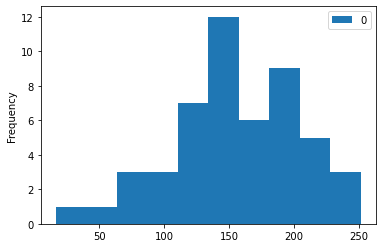

In [12]:
#histogram ile 
pd.DataFrame(olcumler).plot.hist();

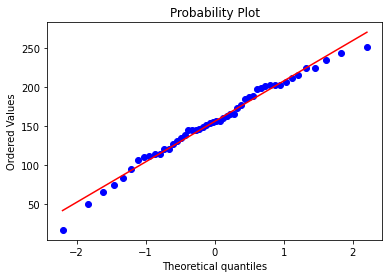

In [13]:
#qqplot ise 
import pylab
stats.probplot(olcumler,dist ="norm",plot=pylab)
pylab.show()

sol taraf örnek(elimizdeki ölçümlerdir) dagılımı; alt taraf ise teorik(ilgilendigimiz normal dagılımdır) dagılımı ifade etmektedir

kırmızı çizgi etrafında konumlanması birine benzedigi anlamına gelir

   ## Shapiro-Wilks Testi

H0=Örnek dagılımı ile teorik normal dagılım arasında istatistiksel olarak bir fark yokturdur

H1=... fark vardır 

In [17]:
from scipy.stats import shapiro

In [18]:
shapiro(olcumler)
#sol taraf degerleri test degerlerini ifade eder 
#sag taraf degerleri p-value degerlerini ifade eder 

ShapiroResult(statistic=0.982902467250824, pvalue=0.6790404319763184)

In [20]:
#daha iyi görüntü olsun diye
print("T hesap İstatistigi:"+str(shapiro(olcumler)[0]))
print("Hesaplanan P-value:"+str(shapiro(olcumler)[1]))

T hesap İstatistigi:0.982902467250824
Hesaplanan P-value:0.6790404319763184


In [21]:
#yukarıdaki yaptıgımız işlemler ile varsayım saglanıyormu  onu bulmaya çalıştık şimdi ise Tek örneklem T testinin uygulamasını Yapacagız 
# Tek örneklem T testi Uygulaması

In [23]:
stats.ttest_1samp(olcumler,popmean=170)

Ttest_1sampResult(statistic=-1.9477822164973055, pvalue=0.05718202507363557)

In [25]:
#burda h0 hipotezi reddedilir olmuştur ,yani web sitesinde ortalama geçirilen süre 170 degildir anlamına gelir

## Nonparametrik Tek Örneklem Testi

In [27]:
#varsayımlar testi yapılır
from statsmodels.stats.descriptivestats import sign_test

In [31]:
sign_test(olcumler,170)
#genelde sol taraftaki test istatistigi ve sag  taraftaki p-value degeridir
#yine bir test yapılıyor merkezi egilime göre yapılıyor 
#elimizdeki veri zaten parametrikti 

(-6.0, 0.11892045255943637)

## Tek Örneklem Oran Testi

oransal bir ifade test edilmek istenildiginde kullanılır 

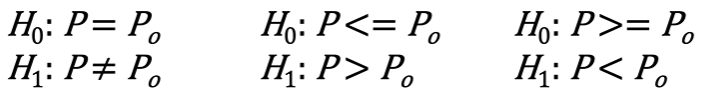

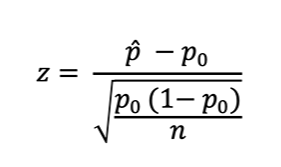

## İş Uygulaması(Dönşüm Oranı Testi)

In [32]:
#python da ondalıklı ifade etmek istersek virgül yerine nokta kullanırınız

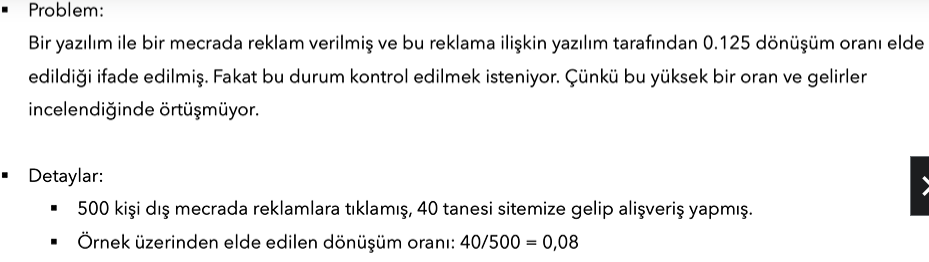

H0:p=0.125

H1:P≠0.125    

In [33]:
from statsmodels.stats.proportion import proportions_ztest

In [34]:
count=40
nobs=500
value=0.125

In [36]:
proportions_ztest(count,nobs,value)#degerin yanlış oldugunu kanıtlamış olduk yüzde 95 oranında 

(-3.7090151628513017, 0.0002080669689845979)

## Bagımsız İki Örneklem T testi (AB Testi) 

iki grup ortalaması arasında karşılaştırma yapılmak istenildiginde kullanılır.

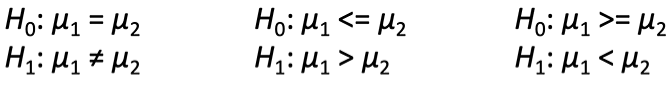

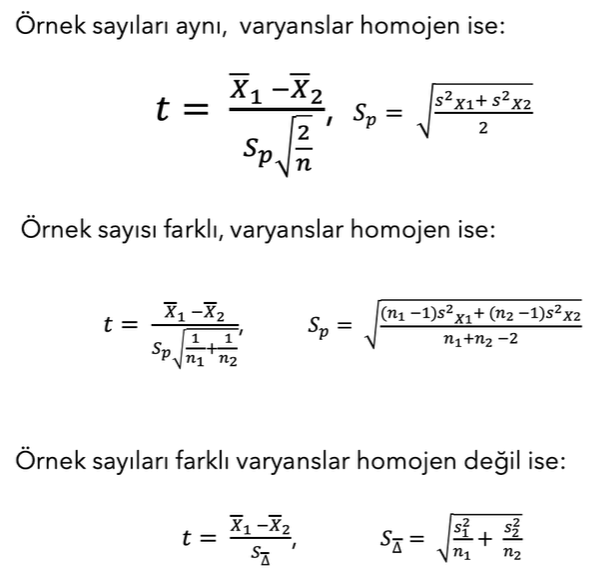

iki varsıyımımız var 

*normallik (elimizdeki iki örnege normallik testi yaparız (görsel ya da hipotez testleri yardımı ile (qqplot-histogram-shapiro wilks)))

*Varyans Homojenligi(grupların varyasnları biribirine benzerse yapılabilir)

## İş Uygulaması(ML modelinin Başarı Testi(AB Testi))

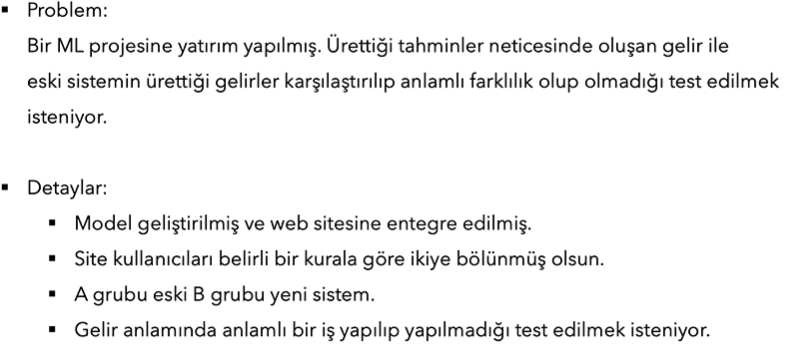

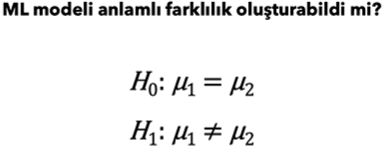

bize excelde veya veri tabanında gelir 2 tane biz bunları karşılaştırması yaparız gerçek hayatta

In [38]:
#Veri tipi 1

In [39]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])


A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A","B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [43]:
#VERI TIPI II
#en en kötü şekilde(senaryoda) veri toplulugu verirlerlse bu testini nasıl uygularızı ve fonksiyonların isteyecegi türe dönüştürmüş oluruzu aşagıdaki yazım ile yapabiliriz

In [41]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])

#A ve A'nın grubu
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A, GRUP_A], axis = 1)

#B ve B'nin Grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis = 1)

#Tum veri
AB = pd.concat([A,B])
AB.columns = ["gelir","GRUP"]
print(AB.head())
print(AB.tail())

   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir GRUP
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


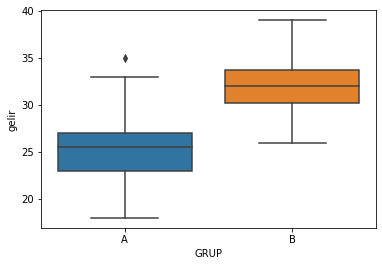

In [44]:
import seaborn as sns 
sns.boxplot(x="GRUP",y="gelir",data=AB);